<a href="https://colab.research.google.com/github/baghel24/DeepLearning-pytorch-basics-/blob/main/Single_Layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)


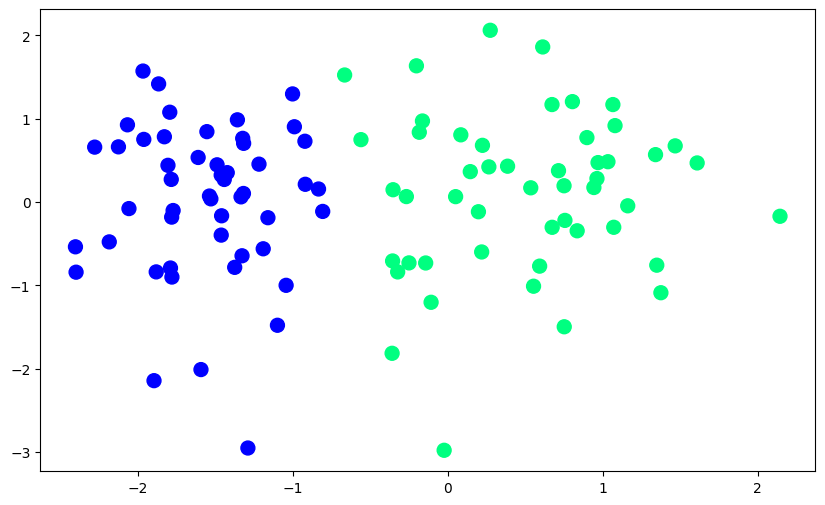

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1], c=y, cmap = 'winter', s =100)

##Single Layer Perceptron using perceptron trick

In [3]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [4]:
def step(z):
  return 1 if z>0 else 0

In [5]:
intercept_, coef_ = perceptron(X,y)

In [6]:
print(coef_)
print(intercept_)

[1.30009809 0.08165687]
0.9


In [7]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [8]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

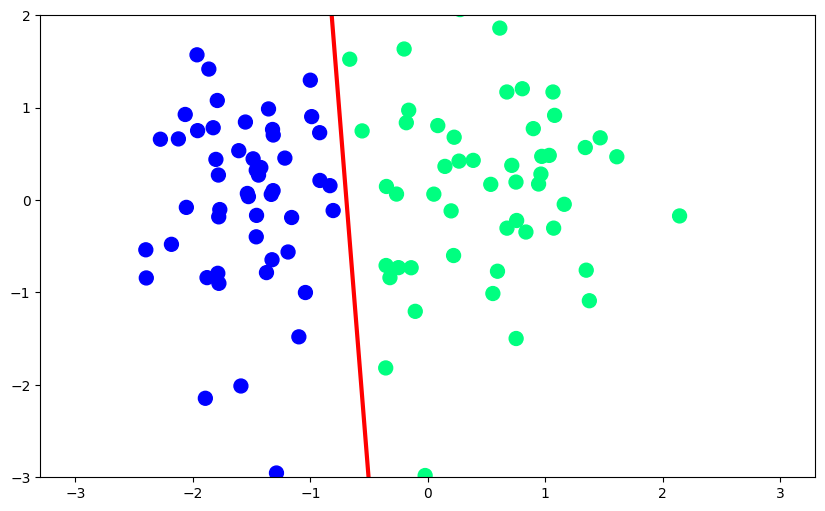

In [9]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

##Single Layer perceptron with loss Function(Hinge Loss Function)

In [10]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)


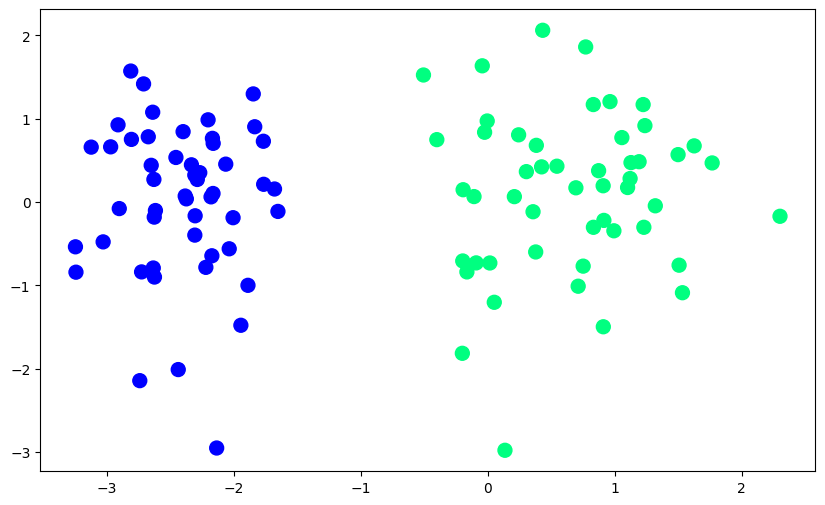

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [12]:
def perceptron(X,y):

    w1=w2=b=1
    lr = 0.1

    for j in range(1000):

        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]

    return w1,w2,b


In [13]:
w1, w2, b = perceptron(X, y)

In [14]:
b

1.3000000000000003

In [15]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

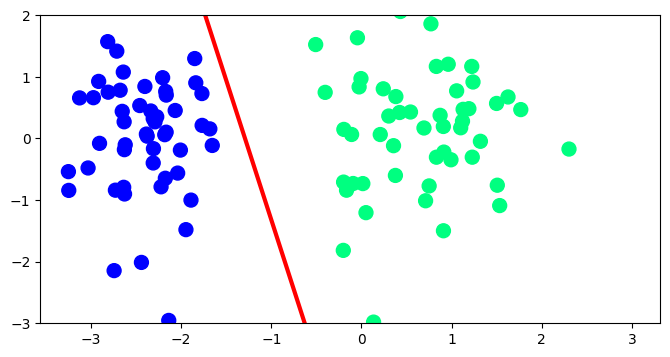

In [16]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(8,4))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

##Single Layer perceptron using tenserflow on mnist data set

In [17]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


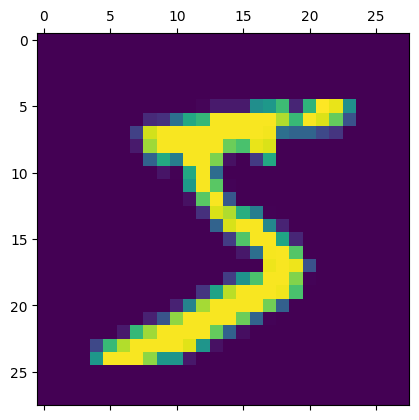

In [19]:
len(x_train)
len(x_test)
x_train[0].shape
plt.matshow(x_train[0])


In [20]:
# Normalizing the dataset
x_train = x_train/255
x_test = x_test/255

# Flatting the dataset in order
# to compute for model building
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [21]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),
                       activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4737 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3043 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2838 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 2s 983us/step - loss: 0.2732 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9252


In [22]:
model.evaluate(x_test_flatten, y_test)


313/313 [==============================] - 0s 930us/step - loss: 0.2704 - accuracy: 0.9237


[0.2703574597835541, 0.9236999750137329]